In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf
import data
import matplotlib.pyplot as plt
import time

In [146]:
class GAN_model:
    
    dataset = np.array([])
    generator = tf.keras.Sequential()
    discriminator = tf.keras.Sequential()
    GAN = tf.keras.Sequential()
    learning_rate = 0.001
    beta_1 = 0.3
    epochs = 5
    batch_size = 2
    plot_batch_size = 2
    
    
    def load_dataset(self, dataloader):
        dataloader.get_names_of_all_the_files()
        dataloader.load_database()
        self.dataset = np.array(dataloader.dataset.reshape(dataloader.instances, 64*64*3, -1)) /255
        return dataloader.dataset.reshape(dataloader.instances, 64*64*3, -1) /255
    
    def generator_model(self):
        self.generator.add(tf.keras.layers.Input(10))
        self.generator.add(tf.keras.layers.Dense(20, activation='tanh', kernel_initializer='he_uniform'))
        self.generator.add(tf.keras.layers.Dense(20, activation='tanh', kernel_initializer='he_uniform'))
        self.generator.add(tf.keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'))
        self.generator.add(tf.keras.layers.Dense(self.dataset.shape[1], activation='sigmoid', kernel_initializer='he_uniform'))
        self.generator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = self.learning_rate, beta_1 = self.beta_1), loss=tf.losses.BinaryCrossentropy(from_logits=True))
        return self.generator.summary()
    
    def discriminator_model(self):
        self.discriminator.add(tf.keras.layers.Input(self.dataset.shape[1]))
        self.discriminator.add(tf.keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'))
        self.discriminator.add(tf.keras.layers.Dense(20, activation='linear', kernel_initializer='he_uniform'))
        self.discriminator.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))
        self.discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = self.learning_rate, beta_1 = self.beta_1), loss=tf.losses.BinaryCrossentropy(from_logits=True))
        return self.discriminator.summary()
    
    def GAN(self):
        self.GAN = tf.keras.Sequential([self.generator, self.discriminator])
        self.GAN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = self.learning_rate, beta_1 = self.beta_1), loss=tf.losses.BinaryCrossentropy(from_logits=True))
        
    
    
    #Training Steps and Sequences here!
    
    def get_random_input(self):
        return np.random.rand(1, 10)
    
    def training_sequences(self):
        self.GAN(tf.ones((1, 10))) #Test!
        for epoch in range(self.epochs):
            self.GAN.layers[0].trainable = False
            self.GAN.layers[1].trainable = True
            for batch in range(self.batch_size):
                # 0 - fake data, 1 - real data
                self.GAN.fit(self.get_random_input(), np.array([0]))
            
            self.GAN.layers[1].fit(self.dataset[epoch].reshape(1, -1), np.array([1]))
            
            self.GAN.layers[0].trainable = True
            self.GAN.layers[1].trainable = False
            
            self.GAN.fit(self.get_random_input(), np.array([1]))
            
            print("Epoch: " + str(epoch) + " of " + str(self.epochs) + " complete.")
            if epoch % self.plot_batch_size == 0:
                print("plotting data!")
                plotdata = np.array(self.GAN.layers[0](self.get_random_input()))
                plotdata = plotdata.reshape(-1, 1).reshape(64, 64, 3)
                plt.imshow(plotdata)
                plt.show()
                time.sleep(1)

In [147]:
G = GAN_model()

In [148]:
D = data.get_dataset()
G.load_dataset(D)

array([[[0.44313725],
        [0.38431373],
        [0.        ],
        ...,
        [0.75294118],
        [0.59215686],
        [0.09019608]],

       [[0.00784314],
        [0.00784314],
        [0.00784314],
        ...,
        [0.53333333],
        [0.19607843],
        [0.24705882]],

       [[0.17647059],
        [0.3254902 ],
        [0.02352941],
        ...,
        [0.30196078],
        [0.22352941],
        [0.50588235]],

       ...,

       [[0.71372549],
        [0.73333333],
        [0.64313725],
        ...,
        [0.2       ],
        [0.29803922],
        [0.18431373]],

       [[0.32156863],
        [0.21960784],
        [0.60784314],
        ...,
        [0.73333333],
        [0.68235294],
        [0.55686275]],

       [[0.59215686],
        [0.34117647],
        [0.29411765],
        ...,
        [0.59215686],
        [0.34117647],
        [0.29411765]]])

In [149]:
G.generator_model()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 20)                220       
                                                                 
 dense_88 (Dense)            (None, 20)                420       
                                                                 
 dense_89 (Dense)            (None, 20)                420       
                                                                 
 dense_90 (Dense)            (None, 12288)             258048    
                                                                 
Total params: 259,108
Trainable params: 259,108
Non-trainable params: 0
_________________________________________________________________


In [150]:
G.discriminator_model()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 20)                245780    
                                                                 
 dense_92 (Dense)            (None, 20)                420       
                                                                 
 dense_93 (Dense)            (None, 1)                 21        
                                                                 
Total params: 246,221
Trainable params: 246,221
Non-trainable params: 0
_________________________________________________________________


In [151]:
G.GAN()

In [152]:
G.GAN(tf.ones((1, 10)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.26671112]], dtype=float32)>

In [153]:
G.GAN(G.get_random_input())

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.2937117]], dtype=float32)>

1/1 [==============================] - 0s 7ms/step - loss: 3.7770
Epoch: 0 of 5 complete.
plotting data!


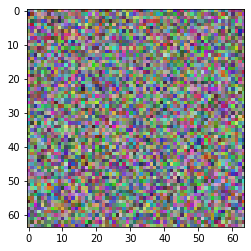

1/1 [==============================] - 0s 8ms/step - loss: 0.0490
Epoch: 1 of 5 complete.
1/1 [==============================] - 0s 8ms/step - loss: 0.6985
Epoch: 2 of 5 complete.
plotting data!


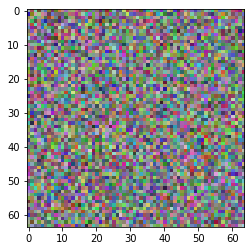

1/1 [==============================] - 0s 7ms/step - loss: 0.6985
Epoch: 3 of 5 complete.
1/1 [==============================] - 0s 16ms/step - loss: 0.6984
Epoch: 4 of 5 complete.
plotting data!


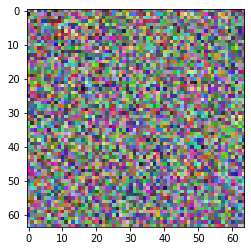

In [154]:
G.training_sequences()

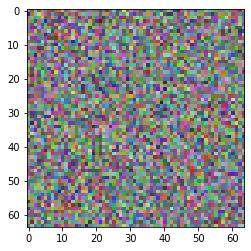

array([[[0.5150288 , 0.5709908 , 0.7353862 ],
        [0.72299916, 0.2850546 , 0.27578783],
        [0.2878018 , 0.84722614, 0.71305925],
        ...,
        [0.76559365, 0.2621367 , 0.46562812],
        [0.6272083 , 0.13378863, 0.56959367],
        [0.5376107 , 0.5639943 , 0.29033324]],

       [[0.25611648, 0.06302877, 0.8022419 ],
        [0.54615456, 0.55175245, 0.10708286],
        [0.6872024 , 0.6081543 , 0.7773016 ],
        ...,
        [0.5011106 , 0.40355286, 0.66728044],
        [0.48692438, 0.5190727 , 0.29546186],
        [0.29657674, 0.3781653 , 0.82233864]],

       [[0.6057255 , 0.5865548 , 0.2976145 ],
        [0.67283565, 0.5769171 , 0.6788633 ],
        [0.14736545, 0.7415247 , 0.3902743 ],
        ...,
        [0.77415395, 0.30548733, 0.3055162 ],
        [0.5592631 , 0.6925976 , 0.68473977],
        [0.55100524, 0.43768755, 0.46394485]],

       ...,

       [[0.4163379 , 0.66578126, 0.5533159 ],
        [0.38527852, 0.5533691 , 0.30402845],
        [0.63787687, 0

In [155]:
plotdata = np.array(G.GAN.layers[0](G.get_random_input()))
plotdata = plotdata.reshape(-1, 1).reshape(64, 64, 3)
plt.imshow(plotdata)
plt.show()
plotdata

In [156]:
G.dataset[0]

array([[0.44313725],
       [0.38431373],
       [0.        ],
       ...,
       [0.75294118],
       [0.59215686],
       [0.09019608]])

In [41]:
G.dataset[0].reshape(1, -1).shape

(1, 12288)